# Yelp Data Challenge - Restaurant Recommender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('/Users/yaru/Downloads/dataset/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


## Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [4]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id','user_id','stars']]

In [5]:
# number of unique business_id and user_id
df_stars['business_id'].nunique(), df_stars['user_id'].nunique()

(4832, 227241)

In [8]:
# Stars counts
df_stars_count = df_stars.groupby('stars').size()
print(df_stars_count)

stars
1     65552
2     42843
3     57420
4    110642
5    239295
dtype: int64


In [9]:
# User comments counts
df_user_count = df_stars.groupby('user_id').size()
print(df_user_count )

user_id
---1lKK3aKOuomHnwAkAow     5
---udAKDsn0yQXmzbWQNSw     2
--0sXNBv6IizZXuV-nl0Aw     1
--2bpE5vyR-2hAP7sZZ4lA     1
--2vR0DIsmQ6WfcSzKWigw     4
--3WaS23LcIXtxyFULJHTA     3
--4uW4yJiRT2oXMYkCPq1Q     1
--56mD0sm1eOogphi2FFLw     2
--66hzx80CeVZcrm4AKJtQ     1
--6u02ZqjZRnwtX3t9bZtQ     1
--7oh57FmI8_IHX0Q4n-Wg     2
--8ELb8W1afbyP21EZStPg     1
--9yZb1OLNN18HyDXgZrJA     1
--A4pFATzQJx9n4l1IAC3A     1
--AujbGl6SYRaY8SFVNHXA     2
--CIuK7sUpaNzalLAlHJKA     2
--DxiDMQgN08E5gTM0aj7Q     1
--EeOyjMPIklMo8fN2GdWQ     1
--FL8jpOVyPYGpyRN007vg     1
--IFH_sbTkfXxbXO4nSEyQ     3
--J3HPoNe-IJ0xE10Z_sDg     1
--LUapetRSkZpFZ2d-MXLQ     9
--Lm6zODOhH_9bLtRQfz4w     1
--MO0Mi5MlB9A-59HYcteA     1
--PJ1FuEoTEo-3Cxf_izRg     2
--QdTWzjRUHa_OkQw-ug8g     1
--RRf-2d2CKi3yGQ9QqrsQ     1
--RlSfc-QmcHFGHyX6aVjA    10
--VFHSTk6Hd3U6D1jYPXAw     1
--W0Zo_aIlD-7JzfHI4IqQ     1
                          ..
zzPMQhJ8_ImffFr3vU-irg     1
zzPebwK0-dhDo7eSZDRKJg     1
zzPyix8usTt0_w0uy7a4sg     1
zzQ_Q8

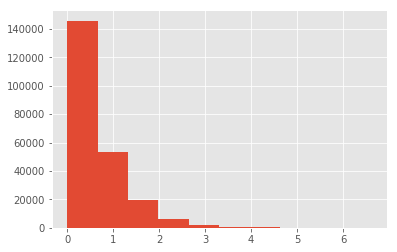

In [13]:
# Visualization of df_user_count
df_user_count.apply(np.log).hist()
plt.show()

In [14]:
# users comments over 5 times
df_users = df_user_count[df_user_count > 5]
df_users.count()

14675

In [15]:
# sum of all comments
df_users.sum()

187598

In [16]:
# index of df_users
df_users.index

Index(['--LUapetRSkZpFZ2d-MXLQ', '--RlSfc-QmcHFGHyX6aVjA',
       '--ZNfWKj1VyVElRx6-g1fg', '-00kdEIhCt-ODaV4BS-EAg',
       '-05XqtNjcBq19vh2CVJN8g', '-0CYm85fllm43U7UQOe82w',
       '-0Hf2jiBo7hJdxYW0Y6PKQ', '-0lFv3aQ5XI9VdiDwsL2vA',
       '-16aKjco1c0RJ7c4U-q_Kw', '-191gKrqDzXGUrpl7npkXw',
       ...
       'zxWMgav2dk1BLGw0HA_KZQ', 'zxmIKyEX89aY0QLC1JJksA',
       'zy1CuLKzsy4WTggLOmRv5Q', 'zyJWc8oW8JpPg2xXMQsnAA',
       'zyMB50UtmEuQf-1VUKxZxQ', 'zyVe-VJfVPTzUHNDn4reBw',
       'zz9rIM0FmlWYvAzr6dGwVQ', 'zzHSF3oCjXqgsYuVJPgdvw',
       'zzMJLd3cWBM6HT8eMbOGbA', 'zzaq5Fn1U2Feut3dGxidNg'],
      dtype='object', name='user_id', length=14675)

In [21]:
# reorder df_users
df_stars_cleaned = df_stars.set_index('user_id').loc[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,--LUapetRSkZpFZ2d-MXLQ,0EgYXYjt2XJL4hlsKnzrcw,4
1,--LUapetRSkZpFZ2d-MXLQ,1aj4TG0eFq6NaPBKk6bK7Q,5
2,--LUapetRSkZpFZ2d-MXLQ,CoyeXg8FBsS_d20QzNIy-A,5
3,--LUapetRSkZpFZ2d-MXLQ,ItqPtxnayraXSlBS0EMOgg,5
4,--LUapetRSkZpFZ2d-MXLQ,PtwW1Hwme8Y0wy54zNr8Xw,5


#### Create utility matrix from records

In [22]:
# create utility matrix, if missing, fill with zero
df_utility = pd.pivot_table(data = df_stars_cleaned,
                            values = 'stars',
                            index = 'user_id',
                            columns = 'business_id',
                            fill_value = 0)
df_utility.head()

In [26]:
df_utility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14675 entries, --LUapetRSkZpFZ2d-MXLQ to zzaq5Fn1U2Feut3dGxidNg
Columns: 4558 entries, --9e1ONYQuAa-CB_Rrw7Tw to zwNC-Ow4eIMan2__bS9-rg
dtypes: int64(4558)
memory usage: 510.4+ MB


## Item-Item similarity recommender

#### NMF

In [29]:
from sklearn.decomposition import NMF

def fit_nmf(M,k):
    nmf = NMF(n_components=k) # initialize transformer 
    nmf.fit(M)
    W = nmf.transform(M);# transform original matrix
    H = nmf.components_; # transformation matrix V, components
    err = nmf.reconstruction_err_
    return W, H, err

In [66]:
# decompose 
W, H, err = fit_nmf(df_utility, 100)
print(err)
print(W.shape,H.shape)

1528.1902988316635
(14675, 100) (100, 4558)


In [67]:
# reconstruct
from scipy import sparse

ratings_mat = sparse.csr_matrix(df_utility)
ratings_mat_fitted = W.dot(H)
errs = np.array((ratings_mat-ratings_mat_fitted).flatten()).squeeze()
mask = np.array((ratings_mat.todense()).flatten()).squeeze()>0

mse = np.mean(errs[mask]**2)
average_abs_err = abs(errs[mask]).mean()
print(mse)
print(average_abs_err) # absolute error, approximate scale

11.83250592868702
2.9771009856435144


In [68]:
# get recommendations for one user
user_id = 100
n = 10

pred_ratings = ratings_mat_fitted[user_id,:]
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1]

items_rated_by_this_user = ratings_mat[user_id].nonzero()[1]

unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating
                                if item not in items_rated_by_this_user]

unrated_items_by_pred_rating[:n]

[279, 4191, 4205, 2314, 4005, 2302, 1759, 46, 3067, 1882]

In [69]:
### check errors
# truth
ratings_true = ratings_mat[user_id, items_rated_by_this_user].todense()
# prediction
ratings_pred = pred_ratings[items_rated_by_this_user]
print(list(zip(np.array(ratings_true).squeeze(),ratings_pred)))
err_one_user = ratings_true-ratings_pred
print(err_one_user)
print(abs(err_one_user).mean())

[(3, 3.1408218018033685), (3, 0.3745403866694805), (4, 0.2853529442018187), (4, 0.0577151772128735), (2, 0.14150822459728163), (4, 0.0061213857633677805), (4, 0.018903462761000453)]
[[-0.1408218   2.62545961  3.71464706  3.94228482  1.85849178  3.99387861
   3.98109654]]
2.893811460085364


#### UVD/SVD

In [70]:
from sklearn.decomposition import TruncatedSVD

def fit_uvd(M,k):
    # use TruncatedSVD to realize UVD
    svd = TruncatedSVD(n_components=k, n_iter=10, random_state=0)
    svd.fit(M)
    V = svd.components_
    U = svd.transform(M) # effectively, it's doing: U = M.dot(V.T)
    return U,V, svd


In [71]:
# decompose
U,V,svd = fit_uvd(ratings_mat,100)

print(U.shape, V.shape)

(14675, 100) (100, 4558)


In [72]:
# reconstruct
from scipy import sparse

ratings_mat = sparse.csr_matrix(df_utility)
ratings_mat_fitted = U.dot(V) # U*V

# calculate errs
errs = np.array((ratings_mat-ratings_mat_fitted).flatten()).squeeze()
mask = np.array((ratings_mat.todense()).flatten()).squeeze()>0

mse = np.mean(errs[mask]**2)
average_abs_err = abs(errs[mask]).mean()
print(mse)
print(average_abs_err)

11.07980129515835
2.918110774240558


In [73]:
# get recommendations for one user
user_id = 100
n = 10

pred_ratings = ratings_mat_fitted[user_id,:]
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1]

items_rated_by_this_user = ratings_mat[user_id].nonzero()[1]

unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating
                                if item not in items_rated_by_this_user]

unrated_items_by_pred_rating[:n]

[4191, 4205, 4005, 2285, 1455, 2314, 4426, 3070, 1704, 1169]

In [74]:
### check errors
# truth
ratings_true = ratings_mat[user_id, items_rated_by_this_user].todense()
# prediction
ratings_pred = pred_ratings[items_rated_by_this_user]
print(list(zip(np.array(ratings_true).squeeze(),ratings_pred)))
err_one_user = ratings_true-ratings_pred
print(err_one_user)
print(abs(err_one_user).mean())

[(3, 1.4839635389207544), (3, 0.34783220226889633), (4, 0.5351493001127487), (4, 0.0756202176368395), (2, 0.19816111028525243), (4, 0.0193421314667938), (4, 0.07350116378458497)]
[[1.51603646 2.6521678  3.4648507  3.92437978 1.80183889 3.98065787
  3.92649884]]
3.0380614765034473


#### GraphLab

In [7]:
import graphlab

# create SFrame
sf_stars = graphlab.SFrame(df_stars)
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,oFyOUOeGTRZhFPF9uTqrTQ,5
--9e1ONYQuAa-CB_Rrw7Tw,2aeNFntqY2QDZLADNo8iQQ,4
--9e1ONYQuAa-CB_Rrw7Tw,gmPP4YFrgYsYQqPYokMgFA,5
--9e1ONYQuAa-CB_Rrw7Tw,aVOGlN9fZ-BXcbtj6dbf0g,5
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,3RTesI_MAwct13LWm4rhLw,4
--9e1ONYQuAa-CB_Rrw7Tw,EAOt1UQhJD0GG3l_jv7rWA,5
--9e1ONYQuAa-CB_Rrw7Tw,C6kw0Rny7jZAGjTj0MWA3Q,5
--9e1ONYQuAa-CB_Rrw7Tw,tTifjrXlRrUme-4c0UW9Bw,5
--9e1ONYQuAa-CB_Rrw7Tw,OtKA03ALQQ1CBhtaJod_Jw,2


In [8]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                        user_id = 'user_id',
                                                                        item_id = 'business_id',
                                                                        target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 515752 observations with 227241 users and 4832 items.

Data prepared in: 0.972724s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 13.556ms                       | 0.25       |

| 99.833ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 231.015ms                           | 0                | 0               |

| 570.204ms                           | 100              | 4832            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.67782s

In [10]:
item_item_rec_result = item_item_rec.recommend(k=10, verbose=False)
item_item_rec_result

user_id,business_id,score,rank
oFyOUOeGTRZhFPF9uTqrTQ,BhueLLvA0k9G1Lr0WeZX9w,0.0054555649453,1
oFyOUOeGTRZhFPF9uTqrTQ,4mb32UmQULqg7IMck28vog,0.00528274064368,2
oFyOUOeGTRZhFPF9uTqrTQ,6fz0hnNIVpLF5v2NqJfA9w,0.0052772303845,3
oFyOUOeGTRZhFPF9uTqrTQ,n8Zqqhff-2cxzWt_nwhU2Q,0.0052749184852,4
oFyOUOeGTRZhFPF9uTqrTQ,E0OKctOhZpUQgwUUBc_RwA,0.00481685044918,5
oFyOUOeGTRZhFPF9uTqrTQ,qqs7LP4TXAoOrSlaKRfz3A,0.00472867869316,6
oFyOUOeGTRZhFPF9uTqrTQ,uW6UHfONAmm8QttPkbMewQ,0.00414170736962,7
oFyOUOeGTRZhFPF9uTqrTQ,fW7SHgmidc32kHSoyLTM2A,0.00412292176105,8
oFyOUOeGTRZhFPF9uTqrTQ,agGJSdMTRrkA6VrYMbC-SQ,0.00408347236349,9
oFyOUOeGTRZhFPF9uTqrTQ,LpGCzgAKNSpzDNEUMVVtZA,0.00395040689631,10


## Other recommenders

* Other features (have you noticed there are other features in the Yelp dataset, e.g. tips, etc.?)
* Popularity-based
* Content-based
* Hybrid

#### Content-based recommender

In [11]:
# get average of numerical features which grouped by business_id
df_average = df.groupby(['business_id']).mean()
df_average.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.706263,0.578834,4.159827,1.010799
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.000000,0.631579,4.736842,1.315789
-1vfRrlnNnNJ5boOVghMPA,3.0,0.428571,0.642857,3.000000,0.428571
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.534483,0.454023,3.867816,1.091954
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.761905,0.650794,3.841270,0.968254


In [12]:
# extract categorical features which grouped by business_id
categories_feat = df.groupby(['business_id']).categories.apply(np.unique)
categories_feat.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw     [['Cajun/Creole', 'Steakhouses', 'Restaurants']]
-1m9o3vGRA8IBPNvNqKLmA    [['African', 'Restaurants', 'Nightlife', 'Bars...
-1vfRrlnNnNJ5boOVghMPA            [['Sushi Bars', 'Korean', 'Restaurants']]
-3zffZUHoY8bQjGfPSoBKQ    [['Seafood', 'Bars', 'Nightlife', 'American (N...
-8R_-EkGpUhBk55K9Dd4mg                            [['Thai', 'Restaurants']]
Name: categories, dtype: object

In [13]:
# convert categorical data into string
categories_feat = categories_feat.str.join('').apply(lambda x: x[1:-1])

In [14]:
# business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_feat).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                             columns=categories, 
                             index=categories_feat.index)
df_categories.head()

,acai,active,activities,acupuncture,adoption,adult,afghan,african,air,aircraft,...,window,windshield,wine,wineries,wings,women,wraps,yoga,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-1vfRrlnNnNJ5boOVghMPA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200,
                   random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_feat.index)

print(svd.explained_variance_ratio_.sum()) # total variance explained
df_categories_svd.head()

0.9932442795155608


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.729615,0.048135,-0.449471,-0.432830,0.022885,0.025200,-0.039898,0.102605,-0.032402,0.011706,...,0.000141,0.001765,-0.001119,-0.008800,-0.005697,-0.003914,0.001520,-0.000086,0.002842,0.005535
-1m9o3vGRA8IBPNvNqKLmA,1.831809,2.004849,0.609203,0.020579,-0.122700,-0.175145,-0.134979,0.163103,0.125498,0.455544,...,-0.004700,-0.021610,-0.002723,-0.012753,-0.003652,-0.008445,-0.016358,0.008700,0.016851,0.010258
-1vfRrlnNnNJ5boOVghMPA,1.019308,0.614910,0.163117,-0.705667,-0.085955,0.128802,-0.061715,0.102017,-0.243518,0.017059,...,-0.000953,-0.003705,0.001133,-0.001210,0.000485,0.000110,0.004121,0.003660,0.002958,0.002375
-3zffZUHoY8bQjGfPSoBKQ,1.496075,1.358226,0.002296,0.196015,-0.049401,-0.190597,-0.146616,0.268089,0.145952,0.445564,...,-0.003396,0.002212,0.001251,0.001392,0.001001,-0.001119,-0.000971,0.002065,-0.001680,0.000885
-8R_-EkGpUhBk55K9Dd4mg,0.706684,0.010360,-0.445351,-0.452623,0.015391,0.054762,-0.038082,0.113284,-0.048356,0.015583,...,-0.000378,0.001176,0.001301,-0.000850,0.000003,-0.010512,-0.005941,0.003810,0.003871,-0.001761


In [16]:
# display feature matrix dimension

print 'df_average : ', df_average.shape
print 'df_categories : ', df_categories.shape
print 'df_categories_svd : ', df_categories_svd.shape

df_average :  (4832, 5)
df_categories :  (4832, 469)
df_categories_svd :  (4832, 200)


In [17]:
# join two to generate feature data for each business_id

df_business = df_average.join(df_categories_svd)

print df_business.shape
df_business.head()

(4832, 205)


,avg_stars,cool,funny,stars,useful,0,1,2,3,4,...,190,191,192,193,194,195,196,197,198,199
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.706263,0.578834,4.159827,1.010799,0.729615,0.048135,-0.449471,-0.432830,0.022885,...,0.000141,0.001765,-0.001119,-0.008800,-0.005697,-0.003914,0.001520,-0.000086,0.002842,0.005535
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.000000,0.631579,4.736842,1.315789,1.831809,2.004849,0.609203,0.020579,-0.122700,...,-0.004700,-0.021610,-0.002723,-0.012753,-0.003652,-0.008445,-0.016358,0.008700,0.016851,0.010258
-1vfRrlnNnNJ5boOVghMPA,3.0,0.428571,0.642857,3.000000,0.428571,1.019308,0.614910,0.163117,-0.705667,-0.085955,...,-0.000953,-0.003705,0.001133,-0.001210,0.000485,0.000110,0.004121,0.003660,0.002958,0.002375
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.534483,0.454023,3.867816,1.091954,1.496075,1.358226,0.002296,0.196015,-0.049401,...,-0.003396,0.002212,0.001251,0.001392,0.001001,-0.001119,-0.000971,0.002065,-0.001680,0.000885
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.761905,0.650794,3.841270,0.968254,0.706684,0.010360,-0.445351,-0.452623,0.015391,...,-0.000378,0.001176,0.001301,-0.000850,0.000003,-0.010512,-0.005941,0.003810,0.003871,-0.001761


In [18]:
# create SFrame for business data

sf_business = graphlab.SFrame(df_business.reset_index())

In [20]:
# build content based recommender
content_rec = graphlab.recommender.item_content_recommender.create(sf_business, 'business_id')

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4832    | 0.0206954   | 346.973ms    |

| 47           | 227104  | 0.972682    | 1.35s        |

| 104          | 502528  | 2.15232     | 2.39s        |

| 145          | 700640  | 3.00083     | 3.46s        |

| 173          | 835936  | 3.5803      | 4.37s        |

| 212          | 1024384 | 4.38742     | 5.37s        |

| 257          | 1241824 | 5.31871     | 6.38s        |

| 306          | 1478592 | 6.33278     | 7.40s        |

| 351          | 1696032 | 7.26407     | 8.46s        |

| 382          | 1845824 | 7.90563     | 9.39s        |

| 420          | 2029440 | 8.69205     | 10.41s       |

| 458          | 2213056 | 9.47848     | 11.40s       |

| 496          | 2396672 | 10.2649     | 12.40s       |

| 535          | 2585120 | 11.072      | 13.43s       |

| 567          | 2739744 | 11.7343     | 14.38s       |

| 597          | 2884704 | 12.3551     | 15.43s       |

| 627          | 3029664 | 12.976      | 16.43s       |

| 667          | 3222944 | 13.8038     | 17.40s       |

| 707          | 3416224 | 14.6316     | 18.45s       |

| 729          | 3522528 | 15.0869     | 19.40s       |

| 754          | 3643328 | 15.6043     | 20.44s       |

| 780          | 3768960 | 16.1424     | 21.46s       |

| 816          | 3942912 | 16.8874     | 22.43s       |

| 851          | 4112032 | 17.6118     | 23.43s       |

| 881          | 4256992 | 18.2326     | 24.45s       |

| 906          | 4377792 | 18.75       | 25.46s       |

| 945          | 4566240 | 19.5571     | 26.44s       |

| 975          | 4711200 | 20.178      | 27.47s       |

| 1007         | 4865824 | 20.8402     | 28.44s       |

| 1052         | 5083264 | 21.7715     | 29.47s       |

| 1103         | 5329696 | 22.827      | 30.43s       |

| 1163         | 5619616 | 24.0687     | 31.44s       |

| 1222         | 5904704 | 25.2897     | 32.47s       |

| 1279         | 6180128 | 26.4694     | 33.45s       |

| 1340         | 6474880 | 27.7318     | 34.46s       |

| 1399         | 6759968 | 28.9528     | 35.45s       |

| 1462         | 7064384 | 30.2566     | 36.47s       |

| 1520         | 7344640 | 31.457      | 37.46s       |

| 1580         | 7634560 | 32.6987     | 38.46s       |

| 1634         | 7895488 | 33.8162     | 39.48s       |

| 1692         | 8175744 | 35.0166     | 40.47s       |

| 1748         | 8446336 | 36.1755     | 41.48s       |

| 1805         | 8721760 | 37.3551     | 42.52s       |

| 1842         | 8900544 | 38.1209     | 43.54s       |

| 1889         | 9127648 | 39.0935     | 44.48s       |

| 1954         | 9441728 | 40.4387     | 45.51s       |

| 2015         | 9736480 | 41.7012     | 46.52s       |

| 2059         | 9949088 | 42.6118     | 47.50s       |

| 2116         | 1e+07   | 43.7914     | 48.49s       |

| 2178         | 1.1e+07 | 45.0745     | 49.52s       |

| 2234         | 1.1e+07 | 46.2334     | 50.50s       |

| 2288         | 1.1e+07 | 47.351      | 51.50s       |

| 2348         | 1.1e+07 | 48.5927     | 52.51s       |

| 2407         | 1.2e+07 | 49.8137     | 53.54s       |

| 2471         | 1.2e+07 | 51.1382     | 54.56s       |

| 2531         | 1.2e+07 | 52.38       | 55.51s       |

| 2590         | 1.3e+07 | 53.601      | 56.52s       |

| 2649         | 1.3e+07 | 54.822      | 57.54s       |

| 2703         | 1.3e+07 | 55.9396     | 58.58s       |

| 2743         | 1.3e+07 | 56.7674     | 59.55s       |

| 2783         | 1.3e+07 | 57.5952     | 1m 0s        |

| 2840         | 1.4e+07 | 58.7748     | 1m 1s        |

| 2901         | 1.4e+07 | 60.0373     | 1m 2s        |

| 2955         | 1.4e+07 | 61.1548     | 1m 3s        |

| 3011         | 1.5e+07 | 62.3137     | 1m 4s        |

| 3058         | 1.5e+07 | 63.2864     | 1m 5s        |

| 3100         | 1.5e+07 | 64.1556     | 1m 6s        |

| 3147         | 1.5e+07 | 65.1283     | 1m 7s        |

| 3192         | 1.5e+07 | 66.0596     | 1m 8s        |

| 3251         | 1.6e+07 | 67.2806     | 1m 9s        |

| 3310         | 1.6e+07 | 68.5017     | 1m 10s       |

| 3368         | 1.6e+07 | 69.702      | 1m 11s       |

| 3425         | 1.7e+07 | 70.8816     | 1m 12s       |

| 3469         | 1.7e+07 | 71.7922     | 1m 13s       |

| 3492         | 1.7e+07 | 72.2682     | 1m 14s       |

| 3532         | 1.7e+07 | 73.096      | 1m 15s       |

| 3570         | 1.7e+07 | 73.8825     | 1m 16s       |

| 3610         | 1.7e+07 | 74.7103     | 1m 17s       |

| 3659         | 1.8e+07 | 75.7243     | 1m 18s       |

| 3708         | 1.8e+07 | 76.7384     | 1m 19s       |

| 3771         | 1.8e+07 | 78.0422     | 1m 20s       |

| 3827         | 1.8e+07 | 79.2012     | 1m 21s       |

| 3883         | 1.9e+07 | 80.3601     | 1m 22s       |

| 3941         | 1.9e+07 | 81.5604     | 1m 23s       |

| 3996         | 1.9e+07 | 82.6987     | 1m 24s       |

| 4052         | 2e+07   | 83.8576     | 1m 25s       |

| 4113         | 2e+07   | 85.12       | 1m 26s       |

| 4171         | 2e+07   | 86.3204     | 1m 27s       |

| 4229         | 2e+07   | 87.5207     | 1m 28s       |

| 4290         | 2.1e+07 | 88.7831     | 1m 29s       |

| 4348         | 2.1e+07 | 89.9834     | 1m 30s       |

| 4411         | 2.1e+07 | 91.2873     | 1m 31s       |

| 4471         | 2.2e+07 | 92.529      | 1m 32s       |

| 4529         | 2.2e+07 | 93.7293     | 1m 33s       |

| 4588         | 2.2e+07 | 94.9503     | 1m 34s       |

| 4642         | 2.2e+07 | 96.0679     | 1m 35s       |

| 4695         | 2.3e+07 | 97.1647     | 1m 36s       |

| 4730         | 2.3e+07 | 97.8891     | 1m 37s       |

| 4784         | 2.3e+07 | 99.0066     | 1m 38s       |

| 4832         | 2.3e+07 | 100         | 1m 39s       |

| Done         |         | 100         | 1m 39s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4832 items.

Data prepared in: 1.41353s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.054078s

In [21]:
# make recommendation for a single item/restaurant
sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item)

business_id,score,rank
TT658qQinO6MBHP9q7rJ8w,0.951566457748,1
uWECX6-Uq9n8v5ipk9R29A,0.950242936611,2
AT1bODcrWTKTRNZKRxO-cA,0.917819261551,3
zcScEL0WEdFkROcnz5379g,0.915316462517,4
p3YqOYELqXtLyHz9T49p_w,0.913488447666,5
5TY6bUT3bbl9aHItiIXXqw,0.911274850368,6
L2W0QLXIIR5MEmhQwZk-iA,0.910526871681,7
VPO8pBUwYz1u6GoG0d2U-Q,0.889103055,8
UNI1agsPX2k3eJSJVB91nw,0.889090418816,9
KXITXbKuE60WSUDs7NZVLQ,0.868394732475,10


In [22]:
# similar items per item

df_similar_items = content_rec.get_similar_items().to_dataframe()
df_similar_items.head(20)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.951566,1
1,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.950243,2
2,--9e1ONYQuAa-CB_Rrw7Tw,AT1bODcrWTKTRNZKRxO-cA,0.917819,3
3,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.915316,4
4,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.913488,5
5,--9e1ONYQuAa-CB_Rrw7Tw,5TY6bUT3bbl9aHItiIXXqw,0.911275,6
6,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.910527,7
7,--9e1ONYQuAa-CB_Rrw7Tw,VPO8pBUwYz1u6GoG0d2U-Q,0.889103,8
8,--9e1ONYQuAa-CB_Rrw7Tw,UNI1agsPX2k3eJSJVB91nw,0.889090,9
9,--9e1ONYQuAa-CB_Rrw7Tw,KXITXbKuE60WSUDs7NZVLQ,0.868395,10


In [26]:
# make recommendation for a single user
# select favored restuarants
df_favored = df_stars[df_stars.stars > 4]
user_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]
# select similar items for user favored restaurants, and sort them to get the top 5
df_similar_items[df_similar_items['business_id'].isin(user_favored.business_id)].sort_values('score',ascending=False).similar[:5]

31140    GkRF8rSvh9cOQuuPeDh9bg
24650    kiweDovyXezj-ZMpB1tlXg
31141    Bm8nRUsZ-dK6g2eJLxMTOw
38170    wAQr_GVUNFSvqFfr3cC9kA
42780    KQoeETpQ1nBEQ6fVOtFgWQ
Name: similar, dtype: object

#### Popularity-based recommender 

In [28]:
# using the SFrame created in Item-item similarity recommender sf_stars
# build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars,
                                                user_id = 'user_id',
                                                item_id = 'business_id',
                                                target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 515752 observations with 227241 users and 4832 items.

Data prepared in: 1.04979s

515752 observations to process; with 4832 unique items.

In [30]:
# recommendataion results
pop_result = pop_rec.recommend()

recommendations finished on 1000/227241 queries. users per second: 31145.9

recommendations finished on 2000/227241 queries. users per second: 35034.2

recommendations finished on 3000/227241 queries. users per second: 34569.4

recommendations finished on 4000/227241 queries. users per second: 33335.6

recommendations finished on 5000/227241 queries. users per second: 34427.2

recommendations finished on 6000/227241 queries. users per second: 34913.6

recommendations finished on 7000/227241 queries. users per second: 35433

recommendations finished on 8000/227241 queries. users per second: 35955.2

recommendations finished on 9000/227241 queries. users per second: 35691.6

recommendations finished on 10000/227241 queries. users per second: 35725.4

recommendations finished on 11000/227241 queries. users per second: 35256.4

recommendations finished on 12000/227241 queries. users per second: 35402.9

recommendations finished on 13000/227241 queries. users per second: 35350

recommendations finished on 14000/227241 queries. users per second: 35436.8

recommendations finished on 15000/227241 queries. users per second: 35108.2

recommendations finished on 16000/227241 queries. users per second: 35432.8

recommendations finished on 17000/227241 queries. users per second: 35180.5

recommendations finished on 18000/227241 queries. users per second: 35478.3

recommendations finished on 19000/227241 queries. users per second: 35382.1

recommendations finished on 20000/227241 queries. users per second: 35577.5

recommendations finished on 21000/227241 queries. users per second: 35099.4

recommendations finished on 22000/227241 queries. users per second: 34908.8

recommendations finished on 23000/227241 queries. users per second: 34314.5

recommendations finished on 24000/227241 queries. users per second: 34131.5

recommendations finished on 25000/227241 queries. users per second: 34062.5

recommendations finished on 26000/227241 queries. users per second: 34002.1

recommendations finished on 27000/227241 queries. users per second: 33956.4

recommendations finished on 28000/227241 queries. users per second: 33850.5

recommendations finished on 29000/227241 queries. users per second: 34022.7

recommendations finished on 30000/227241 queries. users per second: 33861.2

recommendations finished on 31000/227241 queries. users per second: 33808.5

recommendations finished on 32000/227241 queries. users per second: 33718.3

recommendations finished on 33000/227241 queries. users per second: 33703.1

recommendations finished on 34000/227241 queries. users per second: 33857.7

recommendations finished on 35000/227241 queries. users per second: 33900.4

recommendations finished on 36000/227241 queries. users per second: 33920.6

recommendations finished on 37000/227241 queries. users per second: 33906.5

recommendations finished on 38000/227241 queries. users per second: 33877.3

recommendations finished on 39000/227241 queries. users per second: 33881.9

recommendations finished on 40000/227241 queries. users per second: 33771.2

recommendations finished on 41000/227241 queries. users per second: 33786.3

recommendations finished on 42000/227241 queries. users per second: 33774.5

recommendations finished on 43000/227241 queries. users per second: 33860.7

recommendations finished on 44000/227241 queries. users per second: 33915.6

recommendations finished on 45000/227241 queries. users per second: 33985

recommendations finished on 46000/227241 queries. users per second: 33971.1

recommendations finished on 47000/227241 queries. users per second: 33770.4

recommendations finished on 48000/227241 queries. users per second: 33912.5

recommendations finished on 49000/227241 queries. users per second: 33775.4

recommendations finished on 50000/227241 queries. users per second: 33716.2

recommendations finished on 51000/227241 queries. users per second: 33650.5

recommendations finished on 52000/227241 queries. users per second: 33530.5

recommendations finished on 53000/227241 queries. users per second: 33411.9

recommendations finished on 54000/227241 queries. users per second: 33311.6

recommendations finished on 55000/227241 queries. users per second: 33248.2

recommendations finished on 56000/227241 queries. users per second: 33230.7

recommendations finished on 57000/227241 queries. users per second: 33236.2

recommendations finished on 58000/227241 queries. users per second: 33310.3

recommendations finished on 59000/227241 queries. users per second: 33350

recommendations finished on 60000/227241 queries. users per second: 33253.1

recommendations finished on 61000/227241 queries. users per second: 33275.3

recommendations finished on 62000/227241 queries. users per second: 33360.5

recommendations finished on 63000/227241 queries. users per second: 33249.6

recommendations finished on 64000/227241 queries. users per second: 33358.6

recommendations finished on 65000/227241 queries. users per second: 33339.5

recommendations finished on 66000/227241 queries. users per second: 33387.8

recommendations finished on 67000/227241 queries. users per second: 33389.5

recommendations finished on 68000/227241 queries. users per second: 33460.7

recommendations finished on 69000/227241 queries. users per second: 33537

recommendations finished on 70000/227241 queries. users per second: 33270.2

recommendations finished on 71000/227241 queries. users per second: 33029

recommendations finished on 72000/227241 queries. users per second: 32803.6

recommendations finished on 73000/227241 queries. users per second: 32865.5

recommendations finished on 74000/227241 queries. users per second: 32833.8

recommendations finished on 75000/227241 queries. users per second: 32839.2

recommendations finished on 76000/227241 queries. users per second: 32833.7

recommendations finished on 77000/227241 queries. users per second: 32735.2

recommendations finished on 78000/227241 queries. users per second: 32695.2

recommendations finished on 79000/227241 queries. users per second: 32703.9

recommendations finished on 80000/227241 queries. users per second: 32681.6

recommendations finished on 81000/227241 queries. users per second: 32609.8

recommendations finished on 82000/227241 queries. users per second: 32592.6

recommendations finished on 83000/227241 queries. users per second: 32599

recommendations finished on 84000/227241 queries. users per second: 32592.3

recommendations finished on 85000/227241 queries. users per second: 32638.8

recommendations finished on 86000/227241 queries. users per second: 32620.4

recommendations finished on 87000/227241 queries. users per second: 32635

recommendations finished on 88000/227241 queries. users per second: 32592

recommendations finished on 89000/227241 queries. users per second: 32562

recommendations finished on 90000/227241 queries. users per second: 32549.8

recommendations finished on 91000/227241 queries. users per second: 32539.4

recommendations finished on 92000/227241 queries. users per second: 32510.6

recommendations finished on 93000/227241 queries. users per second: 32455.4

recommendations finished on 94000/227241 queries. users per second: 32421.1

recommendations finished on 95000/227241 queries. users per second: 32486.4

recommendations finished on 96000/227241 queries. users per second: 32474.8

recommendations finished on 97000/227241 queries. users per second: 32481.4

recommendations finished on 98000/227241 queries. users per second: 32472

recommendations finished on 99000/227241 queries. users per second: 32383.8

recommendations finished on 100000/227241 queries. users per second: 32284.9

recommendations finished on 101000/227241 queries. users per second: 32293

recommendations finished on 102000/227241 queries. users per second: 32230.7

recommendations finished on 103000/227241 queries. users per second: 32080.2

recommendations finished on 104000/227241 queries. users per second: 32077.8

recommendations finished on 105000/227241 queries. users per second: 31762.1

recommendations finished on 106000/227241 queries. users per second: 31546.1

recommendations finished on 107000/227241 queries. users per second: 31611.3

recommendations finished on 108000/227241 queries. users per second: 31609.3

recommendations finished on 109000/227241 queries. users per second: 31469.7

recommendations finished on 110000/227241 queries. users per second: 31316.2

recommendations finished on 111000/227241 queries. users per second: 31320.4

recommendations finished on 112000/227241 queries. users per second: 31351.4

recommendations finished on 113000/227241 queries. users per second: 31355.8

recommendations finished on 114000/227241 queries. users per second: 31317

recommendations finished on 115000/227241 queries. users per second: 31309

recommendations finished on 116000/227241 queries. users per second: 31302.8

recommendations finished on 117000/227241 queries. users per second: 31295

recommendations finished on 118000/227241 queries. users per second: 31283.8

recommendations finished on 119000/227241 queries. users per second: 31285.5

recommendations finished on 120000/227241 queries. users per second: 31317

recommendations finished on 121000/227241 queries. users per second: 31315.2

recommendations finished on 122000/227241 queries. users per second: 31313.4

recommendations finished on 123000/227241 queries. users per second: 31333.6

recommendations finished on 124000/227241 queries. users per second: 31297.5

recommendations finished on 125000/227241 queries. users per second: 31357.7

recommendations finished on 126000/227241 queries. users per second: 31391.1

recommendations finished on 127000/227241 queries. users per second: 31386.1

recommendations finished on 128000/227241 queries. users per second: 31390.5

recommendations finished on 129000/227241 queries. users per second: 31446.2

recommendations finished on 130000/227241 queries. users per second: 31489.1

recommendations finished on 131000/227241 queries. users per second: 31490.4

recommendations finished on 132000/227241 queries. users per second: 31401.3

recommendations finished on 133000/227241 queries. users per second: 31427.2

recommendations finished on 134000/227241 queries. users per second: 30797.3

recommendations finished on 135000/227241 queries. users per second: 30800.4

recommendations finished on 136000/227241 queries. users per second: 30752.4

recommendations finished on 137000/227241 queries. users per second: 30672.4

recommendations finished on 138000/227241 queries. users per second: 30665.6

recommendations finished on 139000/227241 queries. users per second: 30690.2

recommendations finished on 140000/227241 queries. users per second: 30694.7

recommendations finished on 141000/227241 queries. users per second: 30685.4

recommendations finished on 142000/227241 queries. users per second: 30752.9

recommendations finished on 143000/227241 queries. users per second: 30723.6

recommendations finished on 144000/227241 queries. users per second: 30692

recommendations finished on 145000/227241 queries. users per second: 30710.4

recommendations finished on 146000/227241 queries. users per second: 30695.1

recommendations finished on 147000/227241 queries. users per second: 30655.4

recommendations finished on 148000/227241 queries. users per second: 30660.3

recommendations finished on 149000/227241 queries. users per second: 30692.2

recommendations finished on 150000/227241 queries. users per second: 30654.1

recommendations finished on 151000/227241 queries. users per second: 30648.1

recommendations finished on 152000/227241 queries. users per second: 30697.2

recommendations finished on 153000/227241 queries. users per second: 30702.9

recommendations finished on 154000/227241 queries. users per second: 30686.9

recommendations finished on 155000/227241 queries. users per second: 30710.4

recommendations finished on 156000/227241 queries. users per second: 30707.5

recommendations finished on 157000/227241 queries. users per second: 30756.8

recommendations finished on 158000/227241 queries. users per second: 30757.9

recommendations finished on 159000/227241 queries. users per second: 30777.8

recommendations finished on 160000/227241 queries. users per second: 30798

recommendations finished on 161000/227241 queries. users per second: 30812.5

recommendations finished on 162000/227241 queries. users per second: 30850.1

recommendations finished on 163000/227241 queries. users per second: 30865.2

recommendations finished on 164000/227241 queries. users per second: 30874.6

recommendations finished on 165000/227241 queries. users per second: 30908.7

recommendations finished on 166000/227241 queries. users per second: 30885.1

recommendations finished on 167000/227241 queries. users per second: 30914.5

recommendations finished on 168000/227241 queries. users per second: 30950.4

recommendations finished on 169000/227241 queries. users per second: 31003.2

recommendations finished on 170000/227241 queries. users per second: 31038.5

recommendations finished on 171000/227241 queries. users per second: 31076.1

recommendations finished on 172000/227241 queries. users per second: 31076.7

recommendations finished on 173000/227241 queries. users per second: 31115.9

recommendations finished on 174000/227241 queries. users per second: 31139

recommendations finished on 175000/227241 queries. users per second: 31049.2

recommendations finished on 176000/227241 queries. users per second: 31033.9

recommendations finished on 177000/227241 queries. users per second: 30930.6

recommendations finished on 178000/227241 queries. users per second: 30965.2

recommendations finished on 179000/227241 queries. users per second: 30984.6

recommendations finished on 180000/227241 queries. users per second: 30985.9

recommendations finished on 181000/227241 queries. users per second: 31006.4

recommendations finished on 182000/227241 queries. users per second: 30973.6

recommendations finished on 183000/227241 queries. users per second: 30983.4

recommendations finished on 184000/227241 queries. users per second: 30977.3

recommendations finished on 185000/227241 queries. users per second: 30963

recommendations finished on 186000/227241 queries. users per second: 30948.1

recommendations finished on 187000/227241 queries. users per second: 30850.2

recommendations finished on 188000/227241 queries. users per second: 30800.4

recommendations finished on 189000/227241 queries. users per second: 30824

recommendations finished on 190000/227241 queries. users per second: 30852.5

recommendations finished on 191000/227241 queries. users per second: 30856.2

recommendations finished on 192000/227241 queries. users per second: 30893.6

recommendations finished on 193000/227241 queries. users per second: 30897.6

recommendations finished on 194000/227241 queries. users per second: 30905.9

recommendations finished on 195000/227241 queries. users per second: 30887.2

recommendations finished on 196000/227241 queries. users per second: 30877.4

recommendations finished on 197000/227241 queries. users per second: 30846.1

recommendations finished on 198000/227241 queries. users per second: 30848.6

recommendations finished on 199000/227241 queries. users per second: 30848.1

recommendations finished on 200000/227241 queries. users per second: 30799.3

recommendations finished on 201000/227241 queries. users per second: 30774

recommendations finished on 202000/227241 queries. users per second: 30728.1

recommendations finished on 203000/227241 queries. users per second: 30695.8

recommendations finished on 204000/227241 queries. users per second: 30690.8

recommendations finished on 205000/227241 queries. users per second: 30628.7

recommendations finished on 206000/227241 queries. users per second: 30592.6

recommendations finished on 207000/227241 queries. users per second: 30565.9

recommendations finished on 208000/227241 queries. users per second: 30493.8

recommendations finished on 209000/227241 queries. users per second: 30416.5

recommendations finished on 210000/227241 queries. users per second: 30319.7

recommendations finished on 211000/227241 queries. users per second: 30301.7

recommendations finished on 212000/227241 queries. users per second: 30289.5

recommendations finished on 213000/227241 queries. users per second: 30269.7

recommendations finished on 214000/227241 queries. users per second: 30263.6

recommendations finished on 215000/227241 queries. users per second: 30242.2

recommendations finished on 216000/227241 queries. users per second: 30257.4

recommendations finished on 217000/227241 queries. users per second: 30261

recommendations finished on 218000/227241 queries. users per second: 30255.2

recommendations finished on 219000/227241 queries. users per second: 30221

recommendations finished on 220000/227241 queries. users per second: 30166.7

recommendations finished on 221000/227241 queries. users per second: 30187.4

recommendations finished on 222000/227241 queries. users per second: 30201.8

recommendations finished on 223000/227241 queries. users per second: 30203

recommendations finished on 224000/227241 queries. users per second: 30175

recommendations finished on 225000/227241 queries. users per second: 30123.6

recommendations finished on 226000/227241 queries. users per second: 30033.3

recommendations finished on 227000/227241 queries. users per second: 29884.2

In [31]:
pop_result.print_rows(num_rows=20)

+------------------------+------------------------+-------+------+
|        user_id         |      business_id       | score | rank |
+------------------------+------------------------+-------+------+
| oFyOUOeGTRZhFPF9uTqrTQ | V9eIbZwaOJ7YeMy5bPVm6w |  5.0  |  1   |
| oFyOUOeGTRZhFPF9uTqrTQ | V6u7__4jbEDOgWR8K6qUSw |  5.0  |  2   |
| oFyOUOeGTRZhFPF9uTqrTQ | iQOjQH30LFsj6aO3wJG7nQ |  5.0  |  3   |
| oFyOUOeGTRZhFPF9uTqrTQ | i5vy3X8WBjQ-F7P8HqC7KA |  5.0  |  4   |
| oFyOUOeGTRZhFPF9uTqrTQ | U4ZvCExEi8Chtzu9IVrkCg |  5.0  |  5   |
| oFyOUOeGTRZhFPF9uTqrTQ | hkbZCioL7TkHLZuTXf-5fQ |  5.0  |  6   |
| oFyOUOeGTRZhFPF9uTqrTQ | Flpfv60BjAFazYuDwpjaUQ |  5.0  |  7   |
| oFyOUOeGTRZhFPF9uTqrTQ | FK7JHSUMdznZefUW6X319A |  5.0  |  8   |
| oFyOUOeGTRZhFPF9uTqrTQ | 096iGHoQ-UImxUExuyqlZA |  5.0  |  9   |
| oFyOUOeGTRZhFPF9uTqrTQ | -UtYWvCnUppcSaC_u1pTYQ |  5.0  |  10  |
| 2aeNFntqY2QDZLADNo8iQQ | V9eIbZwaOJ7YeMy5bPVm6w |  5.0  |  1   |
| 2aeNFntqY2QDZLADNo8iQQ | V6u7__4jbEDOgWR8K6qUSw |  5.0  |  2